## Numpy Vectors Assignment

In [95]:
import numpy as np
from matplotlib import pyplot as plt
from ineqpy.inequality import gini

# Initialization
data_path = "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt"
# Results of the calculations
results = {
    "ex4_share_below_poverty": 0,
    "ex4_gini": 0,
    "ex6_gini_policy_a": 0,
    "ex6_gini_policy_b": 0,
    "ex6_gini_which_reduced_more": 0,
    "ex7_gini_policy_c": 0,
    "ex8_revenue_raised": 0,
    "ex9_transfers": 0,
    "ex10_gini_policy_d": 0,
    "ex11_gini_policy_e": 0,
    "ex12_policy_recommendation": 0,
}

### Exercise 1

In [116]:
# Loading the sample U.S. household income data
household_incomes = np.loadtxt(data_path)

### Exercise 2

Percentage of households with income above $500,000 is 1.10%


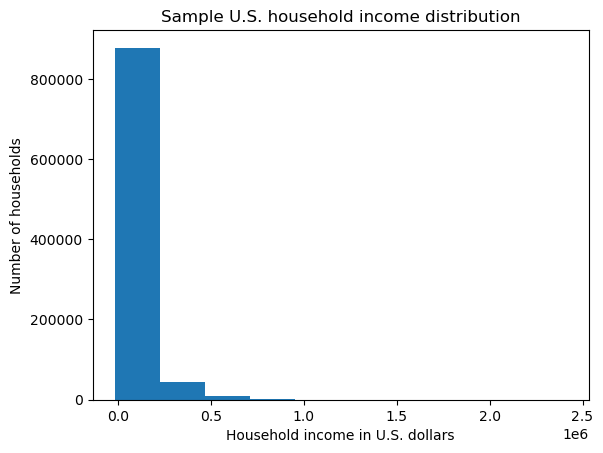

In [119]:
# Plotting the graph
plt.hist(household_incomes)
# Setting the label for the x-axis
plt.xlabel("Household income in U.S. dollars")
# Setting the label for the y-axis
plt.ylabel("Number of households")
# Setting the title
plt.title("Sample U.S. household income distribution")
# Calculating the percentage of household incomes above $500,000
percent_above_500k = len(household_incomes[household_incomes > 500_000]) / len(
    household_incomes
)
# Output the information to 2 decimal places
print(
    f"Percentage of households with income above $500,000 is {percent_above_500k * 100:.2f}%"
)

> This outcome is not normal but skewed to the right. There is just 1.1% of households that take incomes beyond $500,000 and they are _dwarfed_ by the number of households that have incomes up to %500,000. These extreme incomes are to the right tail of the graph, making it difficult to see.

### Exercise 3

Text(0.5, 1.0, 'Sample U.S. household income distribution for incomes below $500,000')

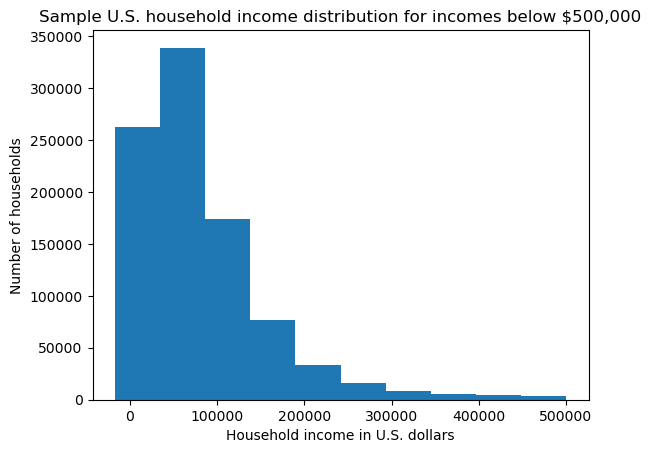

In [125]:
# Extracting the household incomes less than $500,000
household_incomes_less_than_5k = household_incomes[household_incomes < 500_000]
# Plotting the graph
plt.hist(household_incomes_less_than_5k)
# Setting the label for the x-axis
plt.xlabel("Household income in U.S. dollars")
# Setting the label for the y-axis
plt.ylabel("Number of households")
# Setting the title
plt.title("Sample U.S. household income distribution for incomes below $500,000")

> The distribution is still not normal but skewed to the right. Most people have relatively lower incomes below $150,000, peaking around $50,000, with the extreme incomes on the right tail in the income distribution.
>
> Assuming the extreme high earners are those earning above $500,000, I think the skewness in the U.S. income distribution is evident at all income levels. It's however less skewed at incomes below $80,000.

### Exercise 4

In [139]:
# Extracting the household incomes less than $20,000
household_incomes_below_poverty_line = household_incomes[household_incomes < 20_000]

# Calculating share of housholds below poverty line
results["ex4_share_below_poverty"] = len(household_incomes_below_poverty_line) / len(
    household_incomes
)
# Saving the gini in the results dictionary
results["ex4_gini"] = gini(household_incomes)
# Print out the gini result to 4 decimal places
print(f"The Gini Index of income inequality in the US = {results["ex4_gini"]:.4f}")

The Gini Index of income inequality in the US = 0.4811


> This is a measure of the inequality in the household incomes in the U.S. A value of 0 means all households get equal incomes and a value of 1 will mean only one household in the U.S. gets all the income and every other household gets nothing. 0.4811 means the income inequality is not extreme but still significant enough to be seen.

### Exercise 5
The Gini from indexmundi.com is 41.50% for United States whereas I got 48.1%.
The United States Gini from the U.S. Census Bureau is 47.40, which is close to what I got.
Comparing to other countries, I took random countries from different regions:

|No|Continent           |Country          |Gini|
|:-:|:------------------|:----------------|---:|
|1. |South America      |Mexico           |45.40 |
|1. |South America      | Agentina        |42.30 |
|1. |Asia               | China           | 38.20 |
|1. |Asia               | South Korea     | 31.40 |
|1. |Asia/Europe        | Russia          | 36.00 |
|1. |West Africa        | Ghana           | 43.50 |
|1. |Southern Africa    | Kenya           | 40.80 |
|1. |Southern Africa    | South Africa    | 63.00 |
|1. |North Africa       | Morocco         | 39.50 |
|1. |Europe             | Germany         | 31.70 |
|1. |Europe             | Romania         | 34.80 |
|1. |Middle-East        | UAE             | 26.00 |
|1. |Europe             | Slovak Republic | 23.20 |

Some values were suprising and others were expected. The surprising ones are:
1. Russia, I think the gini is lower than expected because of their oligarchy, it's interesting that Russia has a better gini than China and the data was taken just a year apart. I think the wealth of the oligarchs don't show their income.
1. South Africa has a very high gini and I think that's because of their history in apartheid. Some legacy factors influencing the data may be difficult to change. Also, the non-competition from different parties will ensure those close to power increase their income over time.
1. Slovakia wasn't too suprising with its very low gini but that was interesting.
1. UAE in particular was expected to be low because the general population is well taken care of. I also think since income was used and not wealth, this may be representive.

In general, United States' value of 41.5, using the index mundi value to compare is not surprising to me because there's a reasonably high level of inequality, though expected due to the large range of economic activities and household incomes in the country. 

### Exercise 6

In [156]:
# Making a copy of the household incomes before modifying the subset
policy_A_data = household_incomes.copy()
# Adding $5,000 to the incomes less than $40,000
policy_A_data[policy_A_data < 40_000] += 5_000
# Making a copy of the household incomes before modifying the subset
policy_B_data = household_incomes.copy()
# Adding $7,000 to the incomes less than $30,000
policy_B_data[policy_B_data < 30_000] += 7_000

# Saving the result for policy A
results["ex6_gini_policy_a"] = gini(policy_A_data)
# Saving the result for policy B
results["ex6_gini_policy_b"] = gini(policy_B_data)
# Calculating which has lowered inequality more
results["ex6_gini_which_reduced_more"] = \
    "Policy B" if results["ex6_gini_policy_b"] < results["ex6_gini_policy_a"] else "Policy A"

# Print out the gini index result for policy A to 4 decimal places
print(f"The new Gini Index under policy A = {results["ex6_gini_policy_a"]:.4f}")
# Print out the gini index result for policy B to 4 decimal places
print(f"The new Gini Index under policy B = {results["ex6_gini_policy_b"]:.4f}")
# Print out the gini result for the policy that reduces inequality more
print("Policy B will reduce inequality more.")

The new Gini Index under policy A = 0.4602
The new Gini Index under policy B = 0.4583
Policy B will reduce inequality more.


> The Gini Index or Coefficient is a measure of the inequality in the household incomes in the U.S. A value of 0 means all households get equal incomes and a value of 1 will mean only one household in the U.S. gets all the income and every other household gets nothing. 
>
>0.4602 and 0.4583 would mean the income inequality is not extreme but at the higer end of being moderate. The lower Policy B would reduce the enequality more.

### Exercise 7

In [155]:
# Making a copy of the household incomes before modifying the subset
policy_C_data = household_incomes.copy()
# Reducing the household incomes above $250,000 by 5%
policy_C_data[policy_C_data > 250_000] *= (1-0.05)
# Saving the result for policy C
results["ex7_gini_policy_c"] = gini(policy_C_data)

# Print out the gini result for policy C to 4 decimal places
print(f"The new Gini Index under policy C = {results["ex7_gini_policy_c"]:.4f}")

The new Gini Index under policy C = 0.4756


> The Gini Index or Coefficient is a measure of the inequality in the household incomes in the U.S. A value of 0 means all households get equal incomes and a value of 1 will mean only one household in the U.S. gets all the income and every other household gets nothing. 
>
>0.4756 would mean the income inequality is not extreme but at the higer end of being moderate.

### Exercise 8

In [145]:
# Making a copy of the household incomes before modifying the subset
policy_D_data = household_incomes.copy()
# Saving the result for policy D, 5% of the total amount for incomes above $25,000
results["ex8_revenue_raised"] = sum(policy_D_data[policy_D_data > 250_000]) * 0.05

# Print out the generated amount under policy D with 2 decimal places
print(f"The total amount of money generated under policy D = ${results["ex8_revenue_raised"]:,.2f}")

The total amount of money generated under policy D = $929,623,340.85


> When households with income above $250,000 are taxed at a rate of 5%, the amount to be generated would be $929,623,340.85

### Exercise 9

In [147]:
# Extracting the number of households with income below $30,000
no_of_households_below_30k = len(household_incomes[household_incomes < 30_000])
# Saving the amount of money to distribute per household,
# total raised divided by number of households with income below $30,000
results["ex9_transfers"] = results["ex8_revenue_raised"] / no_of_households_below_30k

# Displaying the amount to transfer per household for policy D to 2 decimal places
print(f"The amount of transfers under policy D = ${results["ex9_transfers"]:,.2f}")

The amount of transfers under policy D = $4,208.23


> When households with income above $250,000 are taxed at a rate of 5%, each household with income below $30,000 will be able to receive $4,208.23

### Exercise 10

In [157]:
# Making a copy of the household incomes before modifying the subset
policy_D_data_combined = household_incomes.copy()
# Reducing the household incomes above $250,000 by 5%
policy_D_data_combined[policy_D_data_combined > 250_000] *= (1-0.05)
# Adding the generated fund for each household to the households with income below $30,000
policy_D_data_combined[policy_D_data_combined < 30_000] += (results["ex9_transfers"])
# Saving the gini for policy D
results["ex10_gini_policy_d"] = gini(policy_D_data_combined)

# Print out the Gini Index result for policy D to 4 decimal places
print(f"The new Gini Index under policy D = {results["ex10_gini_policy_d"]:,.4f}")

The new Gini Index under policy D = 0.4617


> The Gini Index or Coefficient is a measure of the inequality in the household incomes in the U.S. A value of 0 means all households get equal incomes and a value of 1 will mean only one household in the U.S. gets all the income and every other household gets nothing. 
>
>0.4617 would mean the income inequality is not extreme but at the higer end of being moderate.

### Excercise 11

In [158]:
# Getting the number of households with income below $40,000
no_of_households_below_40k = len(household_incomes[household_incomes < 40_000])
# Getting the amount of money to distribute per household,
# total raised divided by number of households with income below 40,000
policy_E_transfers = results["ex8_revenue_raised"] / no_of_households_below_40k

# Making a copy of the household incomes before modifying the subset
policy_E_data = household_incomes.copy()
# Even though policy E didn't explicitly say we should deduct, if the tax was generated 
# then it can't still be there. Reducing the household incomes above $250,000 by 5%
policy_E_data[policy_E_data > 250_000] *= (1-0.05) 
# Adding the generated fund for each household to the households with income below $40,000
policy_E_data[policy_E_data < 40_000] += policy_E_transfers
# Saving the gini for policy E
results["ex11_gini_policy_e"] = gini(policy_E_data)

# Print out the Gini Index result for policy E to 4 decimal places
print(f"The new Gini Index under policy E = {results["ex11_gini_policy_e"]:,.4f}")

The new Gini Index under policy E = 0.4626


> The Gini Index or Coefficient is a measure of the inequality in the household incomes in the U.S. A value of 0 means all households get equal incomes and a value of 1 will mean only one household in the U.S. gets all the income and every other household gets nothing. 
>
>0.4617 would mean the income inequality is not extreme but at the higer end of being moderate.

### Excercise 12

In [153]:
# Calculating the policy with the lowest inequality
results["ex12_policy_recommendation"] = \
    "Policy D" if results["ex10_gini_policy_d"] < results["ex11_gini_policy_e"] else "Policy E"

# Print out the policy with the lowest inequality
print(f"The recommended policy is = {results["ex12_policy_recommendation"]}")

The recommended policy is = Policy D


> Between policies D and E, policy D will reduce inequality in household incomes more than policy E

>### Conclusion on the policies
>After checking multiple policies, policy B yeilds the lowest inequality in household incomes in the U.S. In this policy, every household that makes less than 30,000 dollars would be given 7,000 dollars. Though the Gini Index would still be moderate to high, it's the best among the policies under evaluation.

### Testing

In [107]:
# Test that all the answers are there
assert set(results.keys()) == {
    "ex4_share_below_poverty",
    "ex4_gini",
    "ex6_gini_policy_a",
    "ex6_gini_policy_b",
    "ex6_gini_which_reduced_more",
    "ex7_gini_policy_c",
    "ex8_revenue_raised",
    "ex9_transfers",
    "ex10_gini_policy_d",
    "ex11_gini_policy_e",
    "ex12_policy_recommendation",
}

# Test that there's a valid value for every dictionary item
for result in results.values():
    if type(result) != str:
        assert float(result) > 0
    else:
        assert result != ""

### Data Citation

Steven Ruggles, Sarah Flood, Sophia Foster, Ronald Goeken, Jose Pacas, Megan Schouweiler and Matthew Sobek. IPUMS USA: Version 11.0 [dataset]. Minneapolis, MN: IPUMS, 2021. https://doi.org/10.18128/D010.V11.0